In [14]:
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
!pwd
PATH = '/content/drive/MyDrive/'
PATH_AFTER_MYDRIVE = 'MSC_DATA_SCIENCE/ComputerVision_CW/'
FINAL_PATH = PATH + PATH_AFTER_MYDRIVE
%cd $FINAL_PATH

/content
/content/drive/MyDrive/MSC_DATA_SCIENCE/ComputerVision_CW


In [4]:
#HOG 
hog_test = np.load('generated_data/HOG_DES_test.npy')
hog_train = np.load('generated_data/HOG_DES_train.npy')

In [5]:
#SIFT

sift_trainx,sift_trainy = np.load('generated_data/SIFT_DES_trainx.npy'),np.load('generated_data/SIFT_DES_trainy.npy')
sift_testx,sift_testy = np.load('generated_data/SIFT_DES_testx.npy'),np.load('generated_data/SIFT_DES_testy.npy')

In [6]:
test_images  = np.load('generated_data/test_images.npy')
train_images = np.load('generated_data/train_images.npy')
print(np.shape(test_images),'- Test Image Array Shape')
print(np.shape(train_images),'- Train Image Array Shape')

(3068, 100, 100, 3) - Test Image Array Shape
(12271, 100, 100, 3) - Train Image Array Shape


In [7]:
import pandas as pd
train_labels = pd.read_csv('labels/list_label_train.txt',delimiter = "\s+",names = ['File','Class'])
test_labels = pd.read_csv('labels/list_label_test.txt',delimiter = "\s+",names = ['File','Class'])
num2emo = ['Suprise','Fear','Disgust','Happiness','Sadness','Anger','Neurtral']
print(train_labels['Class'].value_counts())
y_train = train_labels['Class'].to_numpy()
print(test_labels['Class'].value_counts())
y_test = test_labels['Class'].to_numpy()
y_train = y_train-1
y_test  = y_test-1
print(min(y_train),max(y_train),'Training Minmax')
print(min(y_test),max(y_test),'Test Minmax')

4    4772
7    2524
5    1982
1    1290
3     717
6     705
2     281
Name: Class, dtype: int64
4    1185
7     680
5     478
1     329
6     162
3     160
2      74
Name: Class, dtype: int64
0 6 Training Minmax
0 6 Test Minmax


**SVM, Training on HOG Feature Descriptor**

In [8]:
# Create a classifier: a support vector classifier 
classifier_hog = svm.SVC(C=1,kernel='rbf',gamma='scale') #rbf gives the best results

classifier_hog.fit(hog_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
from joblib import dump, load
dump(classifier_hog, 'svm_hog.joblib') 

['svm_hog.joblib']

In [45]:
predicted_test = classifier_hog.predict(hog_test).tolist()

In [46]:
accuracy_score(predicted_test, y_test)

0.7004563233376793

In [47]:
f1_score(y_test,predicted_test,average='weighted')

0.6775278481157109

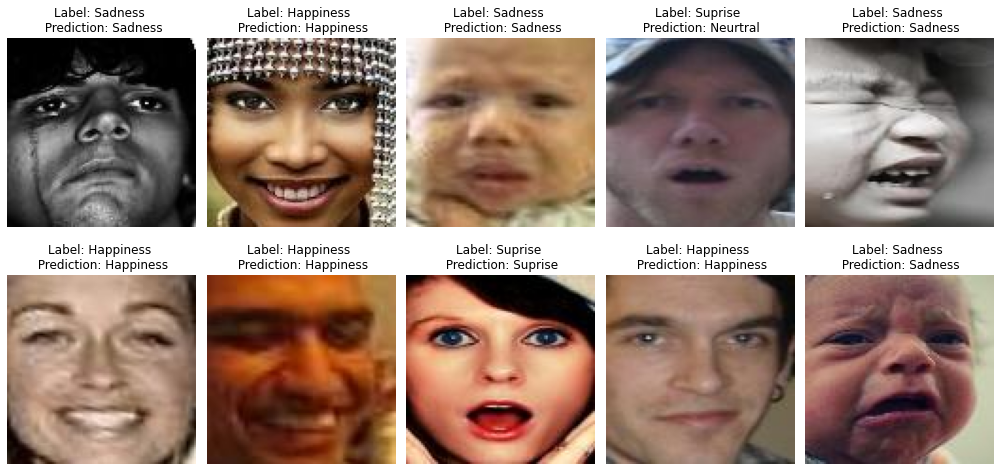

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()

for ind,i in enumerate(np.random.randint(0,3068,10)):
    ax[ind].imshow(test_images[i])
    ax[ind].set_title(f'Label: {num2emo[y_test[i]]} \n Prediction: {num2emo[predicted_test[i]]}')
    ax[ind].set_axis_off()
fig.tight_layout()
plt.show()


**SVM, Training on SIFT Feature Descriptor**

In [24]:
# Create a classifier: a support vector classifier
classifier_sift = svm.SVC(C=1,kernel='linear',gamma='scale') #Linear Kernel 
classifier_sift.fit(sift_trainx,sift_trainy)
predicted_test = classifier_sift.predict(sift_testx).tolist()
accuracy_score(predicted_test, sift_testy)

0.3861709067188519

In [25]:
# Create a classifier: a support vector classifier
classifier_sift = svm.SVC(C=1,kernel='rbf',gamma='scale') #rbf Kernel 
classifier_sift.fit(sift_trainx,sift_trainy)
predicted_test = classifier_sift.predict(sift_testx).tolist()
accuracy_score(predicted_test, sift_testy)

0.41650358773646445

In [26]:
# Create a classifier: a support vector classifier
classifier_sift = svm.SVC(C=1,kernel='poly',gamma='scale') #poly Kernel 
classifier_sift.fit(sift_trainx,sift_trainy)
predicted_test = classifier_sift.predict(sift_testx).tolist()
accuracy_score(predicted_test, sift_testy)

0.3926940639269406

In [27]:
# Create a classifier: a support vector classifier
classifier_sift = svm.SVC(C=0.2,kernel='rbf',gamma='scale') #rbf Kernel , c = 0.2
classifier_sift.fit(sift_trainx,sift_trainy)
predicted_test = classifier_sift.predict(sift_testx).tolist()
accuracy_score(predicted_test, sift_testy)

0.3972602739726027

In [28]:
# Create a classifier: a support vector classifier
classifier_sift = svm.SVC(C=5,kernel='rbf',gamma='scale') #rbf Kernel , c = 5
classifier_sift.fit(sift_trainx,sift_trainy)
predicted_test = classifier_sift.predict(sift_testx).tolist()
accuracy_score(predicted_test, sift_testy)

0.4015003261578604

In [29]:
# Create a classifier: a support vector classifier
classifier_sift = svm.SVC(C=2,kernel='rbf',gamma='scale') #rbf Kernel , c = 2
classifier_sift.fit(sift_trainx,sift_trainy)
predicted_test = classifier_sift.predict(sift_testx).tolist()
accuracy_score(predicted_test, sift_testy)

0.41030658838878015

In [43]:
# Create a classifier: a support vector classifier
classifier_sift = svm.SVC(C=1,kernel='rbf',gamma='scale') #rbf Kernel , c = 1
classifier_sift.fit(sift_trainx,sift_trainy)
predicted_test = classifier_sift.predict(sift_testx).tolist()
accuracy_score(predicted_test, sift_testy)

0.41650358773646445

In [48]:
dump(classifier_sift, 'svm_sift.joblib') 

['svm_sift.joblib']

In [44]:
f1_score(sift_testy,predicted_test,average='weighted')

0.327992732848711

RBF, C=1 is best based on validation acc.

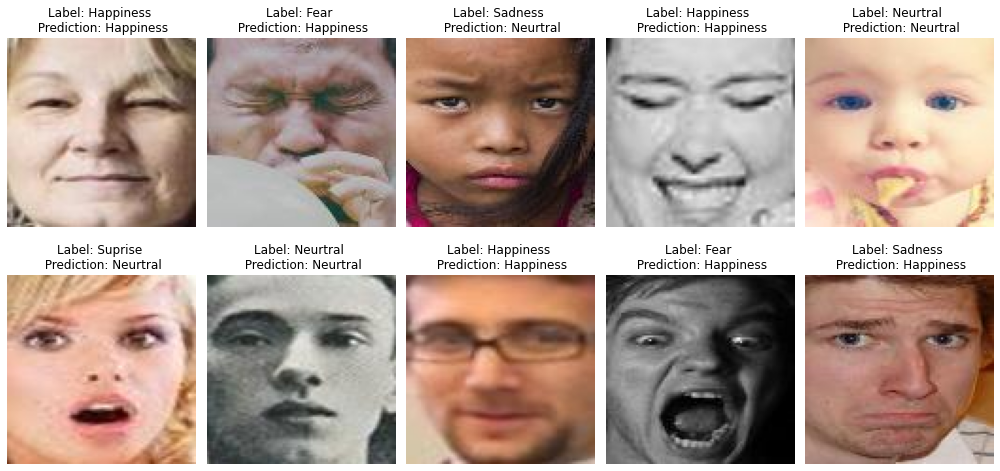

In [34]:
fig, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()

for ind,i in enumerate(np.random.randint(0,3068,10)):
    ax[ind].imshow(test_images[i])
    ax[ind].set_title(f'Label: {num2emo[y_test[i]]} \n Prediction: {num2emo[predicted_test[i]]}')
    ax[ind].set_axis_off()
fig.tight_layout()
plt.show()